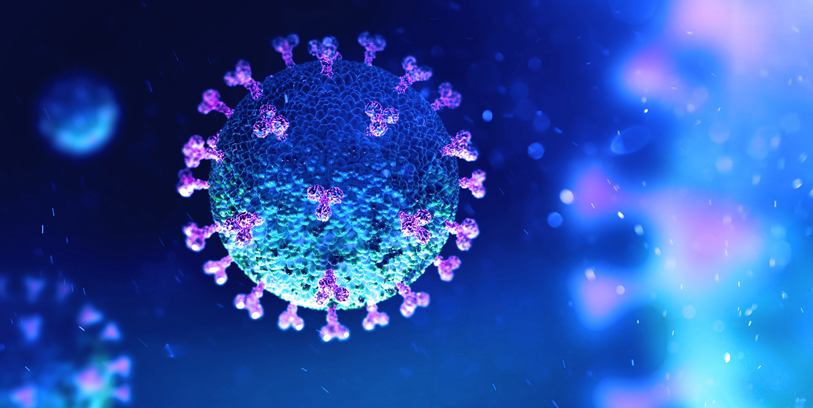

In [165]:
#Graphical of coronavirus
import os
#import imquality.brisque as brisque
#import PIL.Image
from IPython.display import Image
PATH=r"C:\\Users\\U\\Downloads\\"
Image(filename=PATH+'ccc.jpeg',width=800,height=800)

In [166]:
import os #provides function to interact with operating system
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,explained_variance_score,mean_absolute_error,mean_squared_error
from math import sqrt
from datetime import datetime

%matplotlib inline

##convert scientific values to float
np.set_printoptions('formatter'=={'float_kind':'{:f}'.format})


#increases size of snsplot
sns.set(rc=({'figure.figsize':(12,10)}))

In [167]:
# loading dataset
csdata=pd.read_csv(r"C:\Users\U\Downloads\owid-covid-data.csv")
csdata.head(55)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [168]:
csdata.columns[:]
csdata.shape

(75270, 59)

In [169]:
csdata.isnull().sum()

iso_code                                     0
continent                                 3706
location                                     0
date                                         0
total_cases                               1153
new_cases                                 1155
new_cases_smoothed                        2156
total_deaths                             10402
new_deaths                               10244
new_deaths_smoothed                       2156
total_cases_per_million                   1557
new_cases_per_million                     1559
new_cases_smoothed_per_million            2555
total_deaths_per_million                 10793
new_deaths_per_million                   10635
new_deaths_smoothed_per_million           2555
reproduction_rate                        14700
icu_patients                             67511
icu_patients_per_million                 67511
hosp_patients                            65933
hosp_patients_per_million                65933
weekly_icu_ad

In [170]:
#dropping Unnecessary columns
csdata.drop(['human_development_index','hospital_beds_per_thousand','reproduction_rate',
            'stringency_index','life_expectancy','total_tests_per_thousand','handwashing_facilities',
            'population_density','population','new_vaccinations_smoothed_per_million','people_fully_vaccinated_per_hundred',
            'people_vaccinated_per_hundred','new_vaccinations_smoothed','people_fully_vaccinated',
             'new_tests_smoothed_per_thousand','new_tests_smoothed','weekly_hosp_admissions_per_million',
            'weekly_icu_admissions_per_million','hosp_patients_per_million','icu_patients_per_million','extreme_poverty',
            'gdp_per_capita','tests_per_case','total_vaccinations_per_hundred'],axis=1,inplace=True)


In [171]:
csdata1=csdata.replace(np.nan,0)

In [172]:
csdata1.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
icu_patients                       0
hosp_patients                      0
weekly_icu_admissions              0
weekly_hosp_admissions             0
new_tests                          0
total_tests                        0
new_tests_per_thousand             0
positive_rate                      0
tests_units                        0
total_vaccinations                 0
people_vaccinated                  0
n

In [173]:
csdata1.shape

(75270, 35)

In [175]:
csdata1.head(55)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,total_vaccinations,people_vaccinated,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,0.0,0.0,0.000,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,0.0,0.0,0.000,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,0.0,0.0,0.000,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,0.0,0.0,0.000,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0


In [178]:
path='C:\\Users\\U\\Desktop\\Covid19_analysis_dashboard'
os.chdir(path)
csdata1.to_csv('coronavirus powerBI dataset',sep='\t')